In [94]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import RANSACRegressor,LinearRegression,PassiveAggressiveRegressor,Ridge,Lasso,BayesianRidge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
from yellowbrick.regressor import PredictionError,residuals_plot
from sklearn.model_selection import cross_val_score
sns.set()
pd.set_option("display.max_columns",None)

In [95]:
raw_data=pd.read_csv("energy_train.csv")
raw_data

,id,date,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,moisture_4,degree_C5,moisture_5,degree_C6,moisture_6,degree_C7,moisture_7,degree_C8,moisture_8,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
0,1,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,NaN,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,2016-04-24 20:10:00,110,0,22.100000,35.760000,19.533333,37.400000,22.390000,34.030000,21.500000,32.578750,20.600000,41.090000,4.656667,30.626667,21.890000,29.468571,24.356667,35.760000,20.290000,33.030000,5.100000,757.833333,73.666667,4.666667,40.000000,0.7,3.293259,3.293259
14996,14997,2016-04-24 20:20:00,110,10,22.033333,35.626667,19.500000,37.290000,22.426667,34.000000,21.468571,32.471429,20.600000,41.090000,4.560000,31.323333,21.850000,29.456000,24.356667,35.700000,20.290000,32.900000,4.900000,757.866667,75.333333,4.333333,40.000000,0.8,32.690584,32.690584
14997,14998,2016-04-24 20:30:00,110,0,NaN,35.466667,19.426667,37.290000,22.426667,34.000000,21.390000,32.290000,20.600000,40.966667,4.226667,32.596667,21.890000,29.697143,24.390000,35.663333,20.290000,32.826667,4.700000,757.900000,77.000000,4.000000,40.000000,0.9,46.457592,46.457592
14998,14999,2016-04-24 20:40:00,110,0,NaN,35.400000,19.356667,37.360000,22.390000,33.900000,21.390000,32.277143,20.600000,40.900000,3.833333,34.926667,21.956000,30.016000,24.390000,35.663333,20.260000,32.663333,4.500000,757.933333,78.666667,3.666667,40.000000,1.0,43.027440,43.027440


In [96]:
raw_test_data=pd.read_csv("energy_test.csv")
raw_test_data.head()

,id,date,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,moisture_4,degree_C5,moisture_5,degree_C6,moisture_6,degree_C7,moisture_7,degree_C8,moisture_8,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
0,15001,2016-04-24 21:00:00,0,21.926667,35.5,19.2900,37.500000,22.39,34.000000,21.39,32.225714,20.5,40.79,3.466667,37.660000,21.890000,29.976000,24.390000,35.700000,20.200000,NaN,4.10,758.00,82.000000,3.0,40.0,1.2,10.668196,10.668196
1,15002,2016-04-24 21:10:00,0,21.890000,35.4,19.2225,37.425000,22.39,34.090000,21.35,32.200000,20.5,40.79,3.326667,39.526667,21.890000,30.100000,24.390000,35.730000,20.200000,32.400000,3.95,758.05,82.166667,3.0,40.0,1.1,48.467852,48.467852
2,15003,2016-04-24 21:20:00,0,21.890000,35.4,19.2000,37.466667,22.39,33.963333,21.29,32.277143,20.5,40.70,3.290000,41.533333,21.830000,30.140000,24.323333,35.863333,20.200000,32.290000,3.80,758.10,82.333333,3.0,40.0,1.0,36.388536,36.388536
3,15004,2016-04-24 21:30:00,0,21.890000,35.4,19.1000,37.590000,22.39,33.900000,21.29,32.334000,20.5,40.70,3.290000,42.533333,21.804286,30.212857,24.390000,35.933333,20.175000,32.290000,3.65,758.15,82.500000,3.0,40.0,0.9,17.198176,17.198176
4,15005,2016-04-24 21:40:00,0,21.890000,35.4,19.1000,37.590000,22.39,33.966667,21.29,32.290000,20.5,40.70,3.060000,43.396667,21.790000,30.456000,24.323333,36.133333,20.166667,32.563333,3.50,758.20,82.666667,3.0,40.0,0.8,7.200588,7.200588


In [97]:
df_test=raw_test_data.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4375 non-null   int64  
 1   date               4375 non-null   object 
 2   luminousity        4375 non-null   int64  
 3   degree_C1          4375 non-null   float64
 4   moisture_1         4375 non-null   float64
 5   degree_C2          4375 non-null   float64
 6   moisture_2         4375 non-null   float64
 7   degree_C3          4375 non-null   float64
 8   moisture_3         4375 non-null   float64
 9   degree_C4          4375 non-null   float64
 10  moisture_4         4375 non-null   float64
 11  degree_C5          4375 non-null   float64
 12  moisture_5         4375 non-null   float64
 13  degree_C6          4375 non-null   float64
 14  moisture_6         4375 non-null   float64
 15  degree_C7          4375 non-null   float64
 16  moisture_7         4375 

In [98]:
df=raw_data.copy()
df.degree_C1.fillna(df.degree_C2, inplace=True)
df.degree_C3.fillna(df.degree_C2, inplace=True)
df.moisture_9.fillna(df.moisture_8, inplace=True)

In [99]:
df_test.moisture_9.fillna(df_test.moisture_8, inplace=True)

In [100]:
df.isnull().sum()

id                   0
date                 0
WattHour             0
luminousity          0
degree_C1            0
moisture_1           0
degree_C2            0
moisture_2           0
degree_C3            0
moisture_3           0
degree_C4            0
moisture_4           0
degree_C5            0
moisture_5           0
degree_C6            0
moisture_6           0
degree_C7            0
moisture_7           0
degree_C8            0
moisture_8           0
degree_C9            0
moisture_9           0
degree_Cout          0
Pressure             0
moisture_out         0
Wind                 0
Clarity              0
dew_index            0
random_variable_1    0
random_variable_2    0
dtype: int64

In [101]:
df.describe()

,id,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,moisture_4,degree_C5,moisture_5,degree_C6,moisture_6,degree_C7,moisture_7,degree_C8,moisture_8,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,98.751333,4.389333,20.757679,40.223645,19.658822,40.688595,21.275635,39.545294,20.136782,39.118823,18.938388,51.539075,6.177747,63.990750,19.534738,35.246502,21.437768,43.006441,18.743022,42.074476,5.904323,755.512243,81.749333,4.299733,38.760367,2.761777,24.989925,24.989925
std,4330.271354,106.421877,8.453314,1.477151,3.570557,1.524552,3.387494,1.673758,3.149775,1.540814,4.269767,1.318223,8.974743,4.731747,27.818679,1.603169,5.040514,1.722279,5.271153,1.454431,4.445145,4.189812,7.928961,12.980934,2.589470,12.570409,3.577249,14.508441,14.508441
min,1.000000,10.000000,0.000000,16.100000,27.733333,16.100000,25.763333,16.100000,32.626667,15.100000,27.660000,15.330000,35.363333,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.600000,-5.000000,729.300000,31.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,3750.750000,50.000000,0.000000,19.790000,37.590000,18.600000,38.400000,20.200000,37.230000,19.166667,35.700000,18.000000,45.900000,2.900000,44.653750,18.463333,31.500000,20.340000,39.126667,17.790000,38.790000,2.983333,750.650000,73.000000,2.000000,29.000000,0.366667,12.566582,12.566582
50%,7500.500000,60.000000,0.000000,21.000000,39.790000,19.600000,40.760000,21.290000,38.831667,20.206481,38.500000,18.890000,49.326667,6.090000,69.096250,19.500000,34.752714,21.633333,42.582500,18.600000,41.290000,5.850000,756.166667,85.250000,4.000000,40.000000,2.833333,24.858659,24.858659
75%,11250.250000,100.000000,10.000000,21.890000,42.933333,20.666667,43.290000,22.390000,42.000000,21.260000,42.090000,20.000000,54.120774,9.463333,88.090833,20.890000,38.745000,22.700000,46.530000,20.050000,45.000000,8.966667,761.766667,92.000000,6.000000,40.000000,5.300000,37.675790,37.675790
max,15000.000000,1080.000000,70.000000,24.600000,63.360000,24.600000,56.026667,27.600000,50.163333,23.760000,51.090000,22.967778,96.321667,21.290000,99.900000,23.566667,51.400000,25.200000,58.780000,23.840000,58.675556,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530


In [102]:
df["date"] = pd.to_datetime(df["date"])

In [103]:
df_test["date"] = pd.to_datetime(df_test["date"])

In [104]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour
df["minute"] = df["date"].dt.minute

df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month
df_test["day"] = df_test["date"].dt.day
df_test["hour"] = df_test["date"].dt.hour
df_test["minute"] = df_test["date"].dt.minute

In [105]:
df.drop(['id', 'date','random_variable_1','random_variable_2'],axis=1,inplace=True)

df_test.drop(['id', 'date','random_variable_1','random_variable_2'],axis=1,inplace=True)

In [106]:
df['degree_in']=(df['degree_C1'] + df['degree_C2']+ df['degree_C3']+ df['degree_C4']+ df['degree_C5']+ df['degree_C6']+ df['degree_C7']
                 +df['degree_C8']+df['degree_C9'])/9
df['moisture_in']=(df['moisture_1']+df['moisture_2']+df['moisture_3']+df['moisture_4']+df['moisture_5']+df['moisture_6']+df['moisture_7']+
                   df['moisture_8']+df['moisture_9'])/9
                               
df_test['degree_in']=(df_test['degree_C1']+df_test['degree_C2']+df_test['degree_C3']+df_test['degree_C4']+df_test['degree_C5']+
                      df_test['degree_C6']+df_test['degree_C7']+df_test['degree_C8']+df_test['degree_C9'])/9
df_test['moisture_in']=(df_test['moisture_1']+df_test['moisture_2']+df_test['moisture_3']+df_test['moisture_4']+df_test['moisture_5']
                      +df_test['moisture_6']+df_test['moisture_7']+df_test['moisture_8']+df_test['moisture_9'])/9


In [107]:
df['EMA_degree_in']=df['degree_in'].ewm(span=10,adjust=False).mean()
df['EMA_degree_Cout'] = df["degree_Cout"].ewm(span=10,adjust=False).mean()
df['EMA_Pressure'] = df["Pressure"].ewm(span=10,adjust=False).mean()
df['EMA_moisture_out'] = df["moisture_out"].ewm(span=10,adjust=False).mean()
df['EMA_moisture_in'] = df["moisture_in"].ewm(span=10,adjust=False).mean()
df['EMA_Wind'] = df["Wind"].ewm(span=10,adjust=False).mean()
df['EMA_Clarity'] = df["Clarity"].ewm(span=10,adjust=False).mean()
df['EMA_dew_index'] = df["dew_index"].ewm(span=10,adjust=False).mean()


df_test['EMA_degree_in']=df_test['degree_in'].ewm(span=10,adjust=False).mean()
df_test['EMA_degree_Cout'] = df_test["degree_Cout"].ewm(span=10,adjust=False).mean()
df_test['EMA_Pressure'] = df_test["Pressure"].ewm(span=10,adjust=False).mean()
df_test['EMA_moisture_out'] = df_test["moisture_out"].ewm(span=10,adjust=False).mean()
df_test['EMA_moisture_in'] = df_test["moisture_in"].ewm(span=10,adjust=False).mean()
df_test['EMA_Wind'] = df_test["Wind"].ewm(span=10,adjust=False).mean()
df_test['EMA_Clarity'] = df_test["Clarity"].ewm(span=10,adjust=False).mean()
df_test['EMA_dew_index'] = df_test["dew_index"].ewm(span=10,adjust=False).mean()

In [108]:
df.head()

,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,moisture_4,degree_C5,moisture_5,degree_C6,moisture_6,degree_C7,moisture_7,degree_C8,moisture_8,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,year,month,day,hour,minute,degree_in,moisture_in,EMA_degree_in,EMA_degree_Cout,EMA_Pressure,EMA_moisture_out,EMA_moisture_in,EMA_Wind,EMA_Clarity,EMA_dew_index
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016,1,11,17,0,17.167407,50.910741,17.167407,6.600000,733.500000,92.0,50.910741,7.000000,63.000000,5.300000
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016,1,11,17,10,17.149630,50.827222,17.164175,6.578788,733.518182,92.0,50.895556,6.939394,62.303030,5.281818
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016,1,11,17,20,17.103704,50.628889,17.153180,6.540220,733.551240,92.0,50.847071,6.829201,61.035813,5.248760
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016,1,11,17,30,17.067037,50.574815,17.137518,6.487453,733.596469,92.0,50.797570,6.678437,59.302029,5.203531
4,60,40,19.89,46.333333,19.2,44.530000,19.20,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016,1,11,17,40,17.005185,50.732963,17.113457,6.423068,733.651656,92.0,50.785823,6.494479,57.186508,5.148344


In [109]:
df.drop(columns=['degree_C1', 'moisture_1', 'degree_C2',
       'moisture_2', 'degree_C3', 'moisture_3', 'degree_C4', 'moisture_4',
       'degree_C5', 'moisture_5', 'degree_C6', 'moisture_6', 'degree_C7',
       'moisture_7', 'degree_C8', 'moisture_8', 'degree_C9', 'moisture_9'],axis=1,inplace=True)

df_test.drop(columns=['degree_C1', 'moisture_1', 'degree_C2',
       'moisture_2', 'degree_C3', 'moisture_3', 'degree_C4', 'moisture_4',
       'degree_C5', 'moisture_5', 'degree_C6', 'moisture_6', 'degree_C7',
       'moisture_7', 'degree_C8', 'moisture_8', 'degree_C9', 'moisture_9'],axis=1,inplace=True)

In [110]:
df_test

,luminousity,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,year,month,day,hour,minute,degree_in,moisture_in,EMA_degree_in,EMA_degree_Cout,EMA_Pressure,EMA_moisture_out,EMA_moisture_in,EMA_Wind,EMA_Clarity,EMA_dew_index
0,0,4.100000,758.000000,82.000000,3.0,40.000000,1.200000,2016,4,24,21,0,19.493704,35.450190,19.493704,4.100000,758.000000,82.000000,35.450190,3.000000,40.000000,1.200000
1,0,3.950000,758.050000,82.166667,3.0,40.000000,1.100000,2016,4,24,21,10,19.462130,35.295741,19.487963,4.072727,758.009091,82.030303,35.422109,3.000000,40.000000,1.181818
2,0,3.800000,758.100000,82.333333,3.0,40.000000,1.000000,2016,4,24,21,20,19.434815,35.514868,19.478300,4.023140,758.025620,82.085399,35.438974,3.000000,40.000000,1.148760
3,0,3.650000,758.150000,82.500000,3.0,40.000000,0.900000,2016,4,24,21,30,19.425476,35.654836,19.468695,3.955297,758.048234,82.160781,35.478222,3.000000,40.000000,1.103531
4,0,3.500000,758.200000,82.666667,3.0,40.000000,0.800000,2016,4,24,21,40,19.390000,35.832889,19.454387,3.872516,758.075828,82.252761,35.542707,3.000000,40.000000,1.048344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,10,6.166667,757.133333,95.000000,1.0,24.666667,5.433333,2016,5,25,5,20,20.916825,40.721356,20.998274,6.400943,757.259061,93.724360,40.347843,1.002240,25.582352,5.446933
4371,0,6.150000,757.100000,95.500000,1.0,24.500000,5.500000,2016,5,25,5,30,20.918942,40.857778,20.983850,6.355317,757.230141,94.047204,40.440558,1.001833,25.385561,5.456582
4372,0,6.133333,757.066667,96.000000,1.0,24.333333,5.566667,2016,5,25,5,40,20.906296,40.791291,20.969749,6.314956,757.200418,94.402258,40.504328,1.001500,25.194247,5.476597
4373,0,6.116667,757.033333,96.500000,1.0,24.166667,5.633333,2016,5,25,5,50,20.891296,40.617138,20.955485,6.278904,757.170039,94.783665,40.524839,1.001227,25.007414,5.505095


In [111]:
df

,WattHour,luminousity,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,year,month,day,hour,minute,degree_in,moisture_in,EMA_degree_in,EMA_degree_Cout,EMA_Pressure,EMA_moisture_out,EMA_moisture_in,EMA_Wind,EMA_Clarity,EMA_dew_index
0,60,30,6.600000,733.500000,92.000000,7.000000,63.000000,5.3,2016,1,11,17,0,17.167407,50.910741,17.167407,6.600000,733.500000,92.000000,50.910741,7.000000,63.000000,5.300000
1,60,30,6.483333,733.600000,92.000000,6.666667,59.166667,5.2,2016,1,11,17,10,17.149630,50.827222,17.164175,6.578788,733.518182,92.000000,50.895556,6.939394,62.303030,5.281818
2,50,30,6.366667,733.700000,92.000000,6.333333,55.333333,5.1,2016,1,11,17,20,17.103704,50.628889,17.153180,6.540220,733.551240,92.000000,50.847071,6.829201,61.035813,5.248760
3,50,40,6.250000,733.800000,92.000000,6.000000,51.500000,5.0,2016,1,11,17,30,17.067037,50.574815,17.137518,6.487453,733.596469,92.000000,50.797570,6.678437,59.302029,5.203531
4,60,40,6.133333,733.900000,92.000000,5.666667,47.666667,4.9,2016,1,11,17,40,17.005185,50.732963,17.113457,6.423068,733.651656,92.000000,50.785823,6.494479,57.186508,5.148344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,110,0,5.100000,757.833333,73.666667,4.666667,40.000000,0.7,2016,4,24,20,10,19.701852,34.415999,19.781722,6.127217,757.684647,69.511899,34.374651,5.069656,39.999692,0.871240
14996,110,10,4.900000,757.866667,75.333333,4.333333,40.000000,0.8,2016,4,24,20,20,19.676138,34.428603,19.762525,5.904086,757.717742,70.570342,34.384461,4.935779,39.999748,0.858288
14997,110,0,4.700000,757.900000,77.000000,4.000000,40.000000,0.9,2016,4,24,20,30,19.340741,34.533016,19.685837,5.685162,757.750880,71.739371,34.411471,4.765637,39.999794,0.865872
14998,110,0,4.500000,757.933333,78.666667,3.666667,40.000000,1.0,2016,4,24,20,40,19.281407,34.789608,19.612304,5.469678,757.784053,72.998879,34.480223,4.565825,39.999831,0.890259


In [112]:
y_train = df['WattHour']
X_train = df.drop(columns=["WattHour"],axis=1)

X_test = df_test


In [113]:
scaler=StandardScaler()

In [114]:
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [115]:
x_test_scaled

array([[-0.5192614 , -0.43065974,  0.31376617, ..., -0.51306852,
         0.11184653, -0.43943407],
       [-0.5192614 , -0.46646206,  0.32007238, ..., -0.51306852,
         0.11184653, -0.44454556],
       [-0.5192614 , -0.50226438,  0.32637859, ..., -0.51306852,
         0.11184653, -0.45383918],
       ...,
       [-0.5192614 ,  0.0546606 ,  0.19605031, ..., -1.3014909 ,
        -1.23148718,  0.76285415],
       [-0.5192614 ,  0.05068256,  0.19184617, ..., -1.30159848,
        -1.24843861,  0.77086571],
       [-0.5192614 ,  0.04670452,  0.18764203, ..., -1.30168649,
        -1.26505737,  0.78082828]])

In [118]:
        # Split the training data into an extra set of test
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train_scaled, y_train,test_size=.2)
'''plt.figure(figsize=(10, 5))
plt.scatter(y_test_split, y_predicted, s=20)
rmse_pred_vs_actual = rmse(y_predicted, y_test_split)
plt.title(''.join([title_name, ', Predicted vs. Actual.', ' rmse = ', str(rmse_pred_vs_actual)]))
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)])
plt.tight_layout() '''

"plt.figure(figsize=(10, 5))\nplt.scatter(y_test_split, y_predicted, s=20)\nrmse_pred_vs_actual = rmse(y_predicted, y_test_split)\nplt.title(''.join([title_name, ', Predicted vs. Actual.', ' rmse = ', str(rmse_pred_vs_actual)]))\nplt.xlabel('Actual Sale Price')\nplt.ylabel('Predicted Sale Price')\nplt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)])\nplt.tight_layout() "

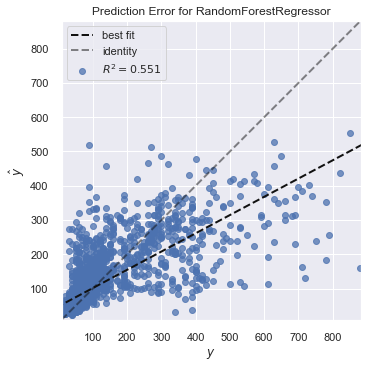

In [119]:
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(x_train_split, y_train_split)  # Fit the training data to the visualizer
visualizer.score(x_test_split, y_test_split)  # Evaluate the model on the test data
visualizer.show()   

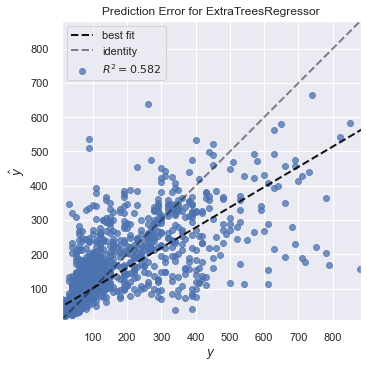

In [120]:
model2 = ExtraTreesRegressor()
visualizer = PredictionError(model2)

visualizer.fit(x_train_split, y_train_split)  # Fit the training data to the visualizer
visualizer.score(x_test_split, y_test_split)  # Evaluate the model on the test data
visualizer.show() 

In [144]:
model = ExtraTreesRegressor()
model.fit(x_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(10,100,15),
        'min_samples_leaf': range(20,80,15),
        'min_samples_split': range(15,80,15),
    },
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=3
)



In [132]:
grid_result = gsc.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


In [133]:
grid_result.best_params_

{'min_samples_leaf': 65, 'min_samples_split': 75, 'n_estimators': 85}

In [149]:
model1 = ExtraTreesRegressor(**grid_result.best_params_)

model1.fit(x_train_scaled, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=65,
                    min_samples_split=75, min_weight_fraction_leaf=0.0,
                    n_estimators=85, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [150]:
y_pred=pd.DataFrame(model1.predict(x_test_scaled).astype(int))
y_pred

,0
0,89
1,89
2,89
3,90
4,90
...,...
4370,73
4371,72
4372,72
4373,71


In [151]:
y_pred.rename(columns={0:'WattHour'},inplace=True)
y_pred.set_index(raw_test_data['id'],inplace=True)
y_pred.describe()

,WattHour
count,4375.000000
mean,100.079771
std,36.366904
min,48.000000
25%,65.000000
50%,96.000000
75%,131.000000
max,220.000000


In [152]:
y_pred

,WattHour
id,
15001,89
15002,89
15003,89
15004,90
15005,90
...,...
19371,73
19372,72
19373,72


In [148]:
y_pred.to_csv("submissionfinal.csv",index=True)